 # MNIST test
 ## Import libraries

In [ ]:
# hide warning
# https://stackoverflow.com/questions/66092421/how-to-rebuild-tensorflow-with-the-compiler-flags
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

2023-03-20 17:34:14.856939: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data loading

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


## Data normalization

In [4]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


## Data visualization

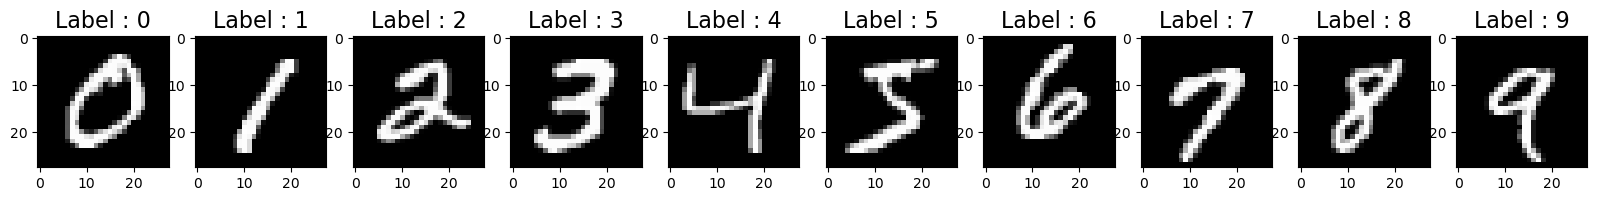

In [5]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range (0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("Label : {}".format(i), fontsize = 16)

In [6]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Reshape data

In [8]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


## Create Model - Fully connected Neural Network

In [9]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu')) #Solve nl equation
model.add(Dense(units=128, activation='relu')) # other layer
model.add(Dropout(0.25)) #25% are gonna be deactivated during training
model.add(Dense(units=10, activation='softmax')) #output 10 layers

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


2023-03-20 17:35:58.910684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Train

In [10]:
model.fit(x=x_train, y=y_train, batch_size=512, epochs=10)

Epoch 1/10
118/118 [==============================] - 1s 5ms/step - loss: 0.6030 - accuracy: 0.8272
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2219 - accuracy: 0.9360
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1599 - accuracy: 0.9540
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1272 - accuracy: 0.9628
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1057 - accuracy: 0.9684
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0880 - accuracy: 0.9743
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0766 - accuracy: 0.9772
Epoch 8/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0650 - accuracy: 0.9804
Epoch 9/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0586 - accuracy: 0.9821
Epoch 10/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0509 - accuracy: 0.9847

## Evaluate

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss : {}, Test Accuracy : {}".format(test_loss, test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9736
Test Loss : 0.0800149142742157, Test Accuracy : 0.9735999703407288


In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[1.62677441e-06 1.23779114e-06 1.50367268e-04 ... 9.99803841e-01
  2.78770085e-06 2.32682009e-06]
 [3.85885208e-08 3.25212241e-05 9.99967098e-01 ... 5.42126521e-09
  9.30537283e-08 7.72931857e-11]
 [1.54510544e-05 9.95225668e-01 6.13444834e-04 ... 2.01591710e-03
  1.25287718e-03 1.12132038e-05]
 ...
 [6.34567510e-10 9.82373578e-08 9.12911879e-09 ... 2.54278507e-06
  1.51017758e-07 1.01985315e-05]
 [2.25523891e-07 1.63624829e-08 1.33258848e-09 ... 3.75663518e-08
  5.72595418e-05 9.73010561e-10]
 [7.01276903e-08 1.56216620e-11 5.40870033e-08 ... 6.89768338e-13
  4.52611254e-10 6.28364583e-10]]
[7 2 1 ... 4 5 6]


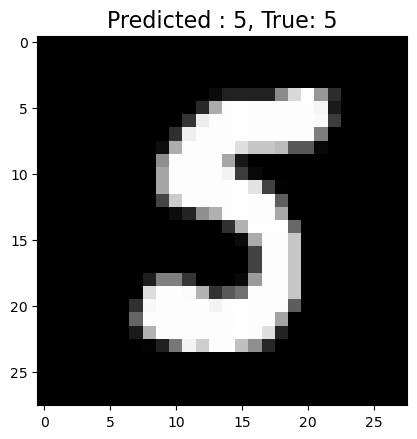

In [14]:
# Random example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted : {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap = 'gray')

## Confusion matrix

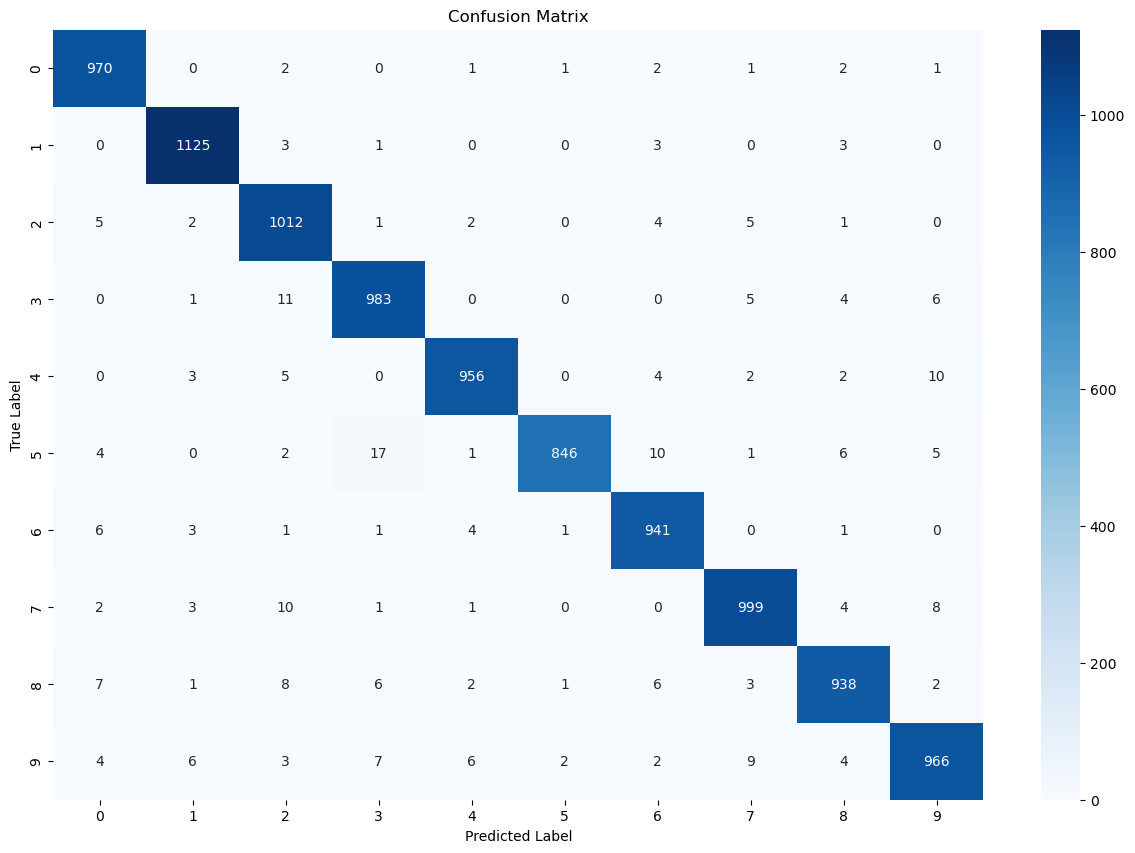

In [16]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

## Investigate some errors

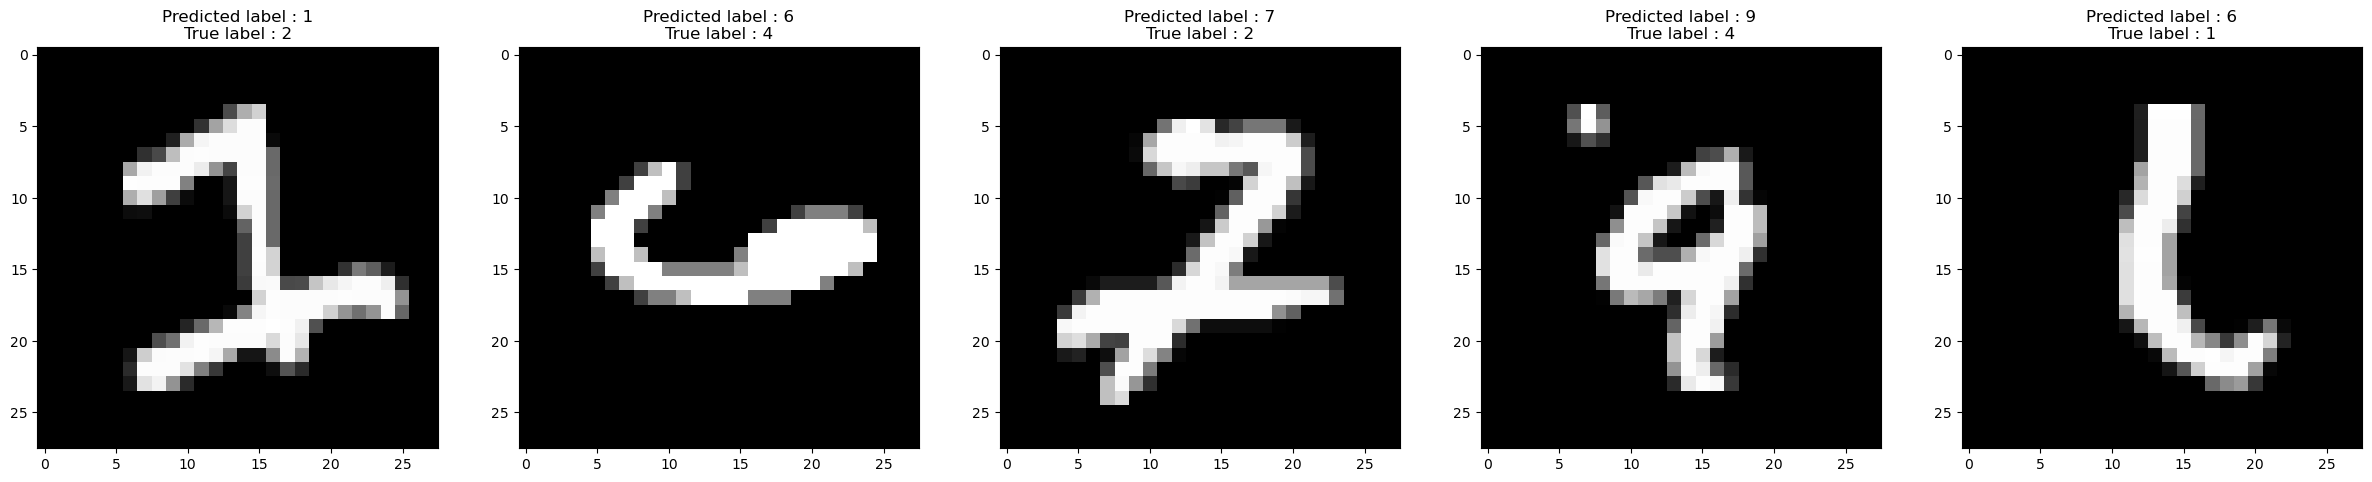

In [21]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

# Find errors where the probability is the lower
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] #5 last ones

# Show top errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
    idx = top_idx_diff_errors[i]
    sample = x_test_errors[idx].reshape(28,28)
    y_t = y_true_errors[idx]
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Predicted label : {}\nTrue label : {}".format(y_t, y_p, fontsize = 22))